In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import scipy
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
sns.set()

In [7]:
data = pd.read_csv('SF_HSF_COCO.csv')

In [8]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Images,Captions,Objects,HSF,SF_1,SF_2,SF_3,SF_4,SF_5,SF_6,SF_7,SF_8,SF_9,SF_10
0,0,0,0,0,1.jpg,a dog nose to nose with a young girl.',"['girl','dog','car','box','nose']",0.60000,0.964565,0.994005,0.988913,0.548252,0.091375,0.169419,0.342657,0.618851,0.412275,0.422041
1,1,1,1,1,2.jpg,a person holding a burnt foot long hotdog.',"['hotdog','ketchup','burger','bear','hand','pe...",0.33333,0.665617,0.943510,0.888696,0.181015,0.025859,0.052476,0.135761,0.486044,0.153937,0.165577
2,2,2,2,2,3.jpg,a smiling man and a woman making food.',"['men','women','food','utensils','knife']",0.60000,0.897932,0.982217,0.967278,0.458417,0.076403,0.141659,0.286510,0.592589,0.344720,0.367716
3,3,3,3,3,4.jpg,a young boy standing on top of a grass covered...,"['boy','tree','grass','ball','gloves']",0.80000,0.963350,0.993796,0.988528,0.663760,0.110627,0.205113,0.368755,0.618388,0.456892,0.485088
4,4,4,4,4,5.jpg,a person biting into a sandwich while sitting ...,"['man','sandwich','chair','bills','monitor','s...",0.57143,0.919557,0.989572,0.977260,0.469871,0.058734,0.128882,0.299009,0.601304,0.357921,0.374917


In [9]:
def SFvsHSF(sf,hsf,axes,x_label):
    
    regr = linear_model.LinearRegression()
    correlation, p = scipy.stats.pearsonr(sf,hsf)
        
    sf =  np.reshape(sf,((len(sf), 1)))
    hsf =  np.reshape(hsf,(len(hsf), 1))
    regr.fit(sf, hsf)
    x_test = sf
    y_pred = regr.predict(x_test)
    x = [i[0] for i in sf]
    y = [i[0] for i in hsf]
    
    X = np.array(sf)
    Y = np.array(hsf)

    kfold = model_selection.KFold(n_splits=10)
    model = LinearRegression()
    scoring = 'r2'

    results = model_selection.cross_val_score(model, X.reshape(-1,1), Y.reshape(-1,1), cv=kfold, scoring=scoring)
    r2 = results.mean()
    
    my_data = pd.DataFrame({'x':x, 'y':y})
    sns.regplot(x='x',y='y', ci=95, data=my_data, ax=axes)
    axes.set_ylabel('')    
    axes.set_xlabel(x_label)
    axes.set_xlim(0,1.01)
    axes.set_ylim(0,1.02)
    
    axes.text(1.05, 0.5, '$\\rho$ = '+str(round(correlation,2)))
    axes.text(1.05, 0.4, 'p = '+str(p))
    axes.text(1.05, 0.3, '$R^2$ = '+str(round(r2,2)))   

In [10]:
HSF = [value for value in data['HSF']]
SF_1 = [value for value in data['SF_1']]
SF_2 = [value for value in data['SF_2']]
SF_3 = [value for value in data['SF_3']]
SF_4 = [value for value in data['SF_4']]
SF_5 = [value for value in data['SF_5']]
SF_6 = [value for value in data['SF_6']]
SF_7 = [value for value in data['SF_7']]
SF_8 = [value for value in data['SF_8']]
SF_9 = [value for value in data['SF_9']]
SF_10 = [value for value in data['SF_10']]

$$x=\frac{\#N}{\#O}$$

$$SF_1 = {S_i}^{1-x}\quad SF_2 = {S_i}^{\frac{1-x}{max(\#O,\#N)+1}}\quad SF_3 = {S_i}^{\frac{1-x}{\sqrt{max(\#O,\#N)}+1}}$$ 

$$SF_4 = {S_i}*{x} \quad SF_5 = {S_i}*{\frac{x}{max(\#O,\#N)+1}}\quad SF_6 = {S_i}*{\frac{x}{\sqrt{max(\#O,\#N)}+1}}\quad SF_7 = {S_i}*(1-\frac{1}{1+x}) $$  

$$SF_8 = (1-e^{(-S_i^{1-x})})\quad SF_9 = {S_i}*(1-e^{(-x)}) \quad SF_{10} = (1-e^{(-S_i*x)})$$

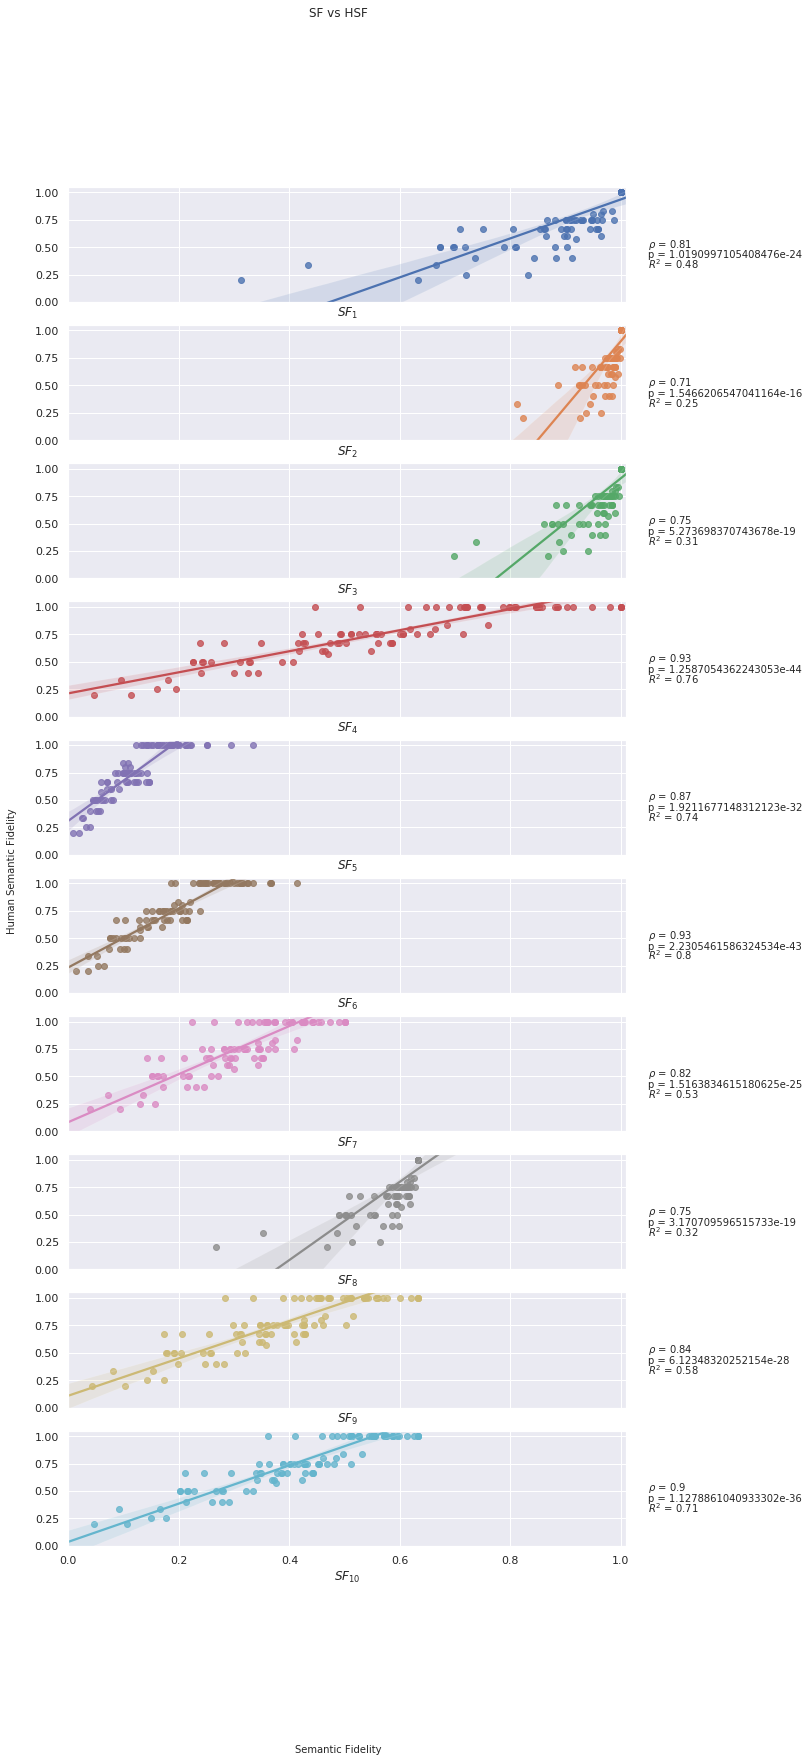

In [28]:
fig, axs = plt.subplots(10, 1, sharex=True, sharey=True,figsize=(10,25))

((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10)) = axs

SFvsHSF(SF_1,HSF,ax1,'$SF_{1}$')
SFvsHSF(SF_2,HSF,ax2,'$SF_{2}$')
SFvsHSF(SF_3,HSF,ax3,'$SF_{3}$')
SFvsHSF(SF_4,HSF,ax4,'$SF_{4}$')
SFvsHSF(SF_5,HSF,ax5,'$SF_{5}$')
SFvsHSF(SF_6,HSF,ax6,'$SF_{6}$')
SFvsHSF(SF_7,HSF,ax7,'$SF_{7}$')
SFvsHSF(SF_8,HSF,ax8,'$SF_{8}$')
SFvsHSF(SF_9,HSF,ax9,'$SF_{9}$')
SFvsHSF(SF_10,HSF,ax10,'$SF_{10}$')

fig.suptitle('SF vs HSF')
   
fig.text(0.5, 0.01, 'Semantic Fidelity', ha='center')
fig.text(0.04, 0.5, 'Human Semantic Fidelity', va='center', rotation='vertical')

plt.ylim(top=1.05)
plt.show()
